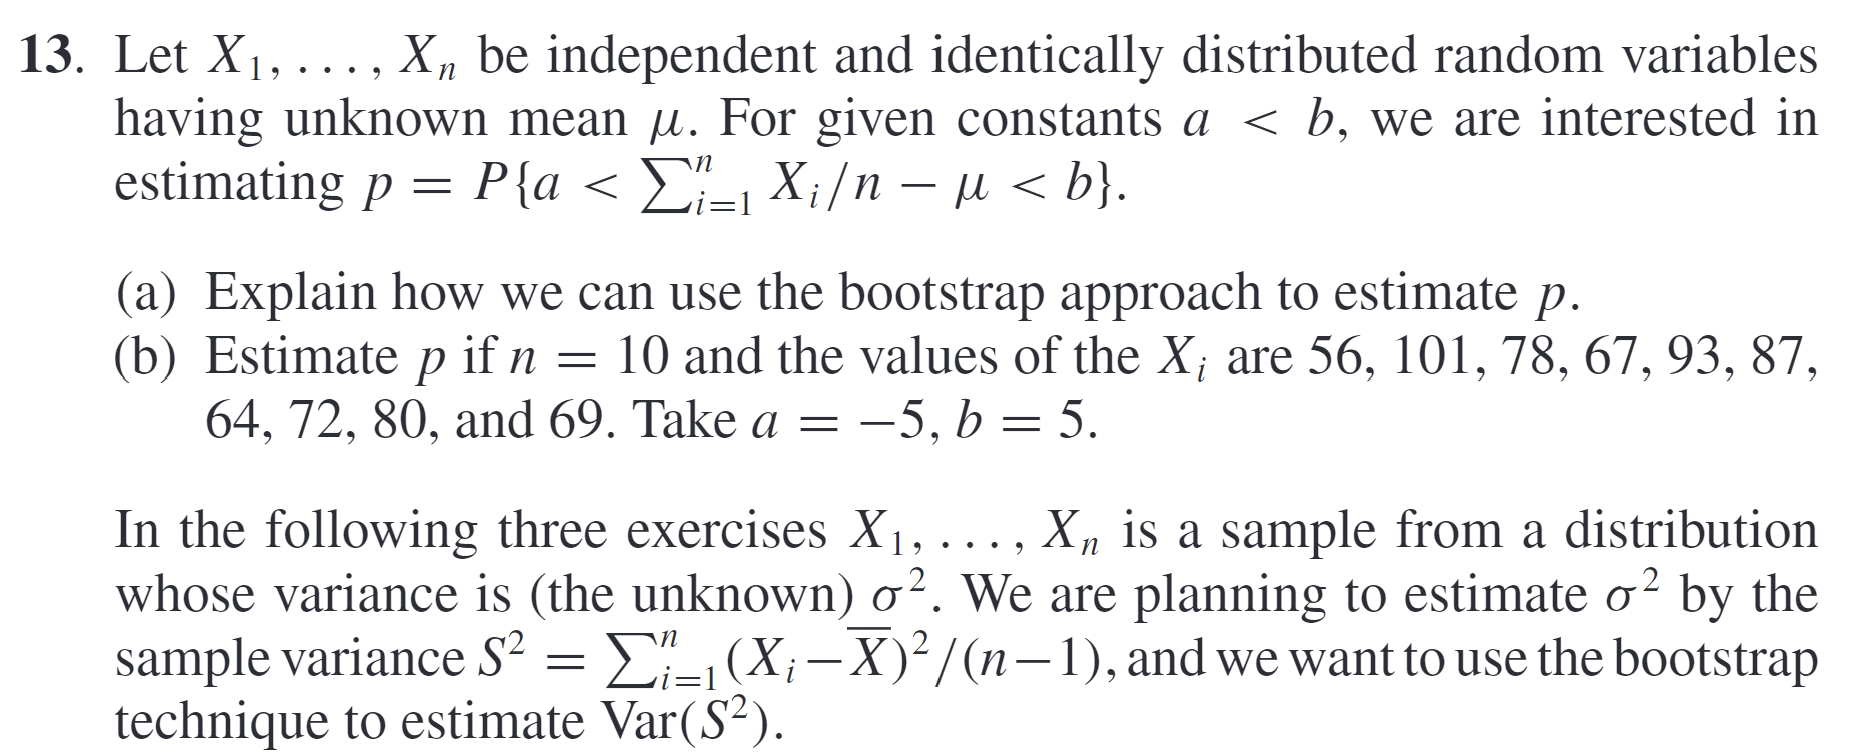

In [2]:
import numpy as np

In [14]:
X = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
a = -5
b = 5
mu = np.mean(X)
iterations = 10000
mean_deviations = np.zeros(iterations)
for i in range(iterations):
    # bootstrap sample from X
    X_sample = np.random.choice(X, len(X), replace=True)
    mean_deviations[i] = np.mean(X_sample) - mu

P = np.mean((a< mean_deviations)*( mean_deviations < b))
print("P({} < X_bar - mu < {}) = {}".format(a, b, P))

P(-5 < X_bar - mu < 5) = 0.7635


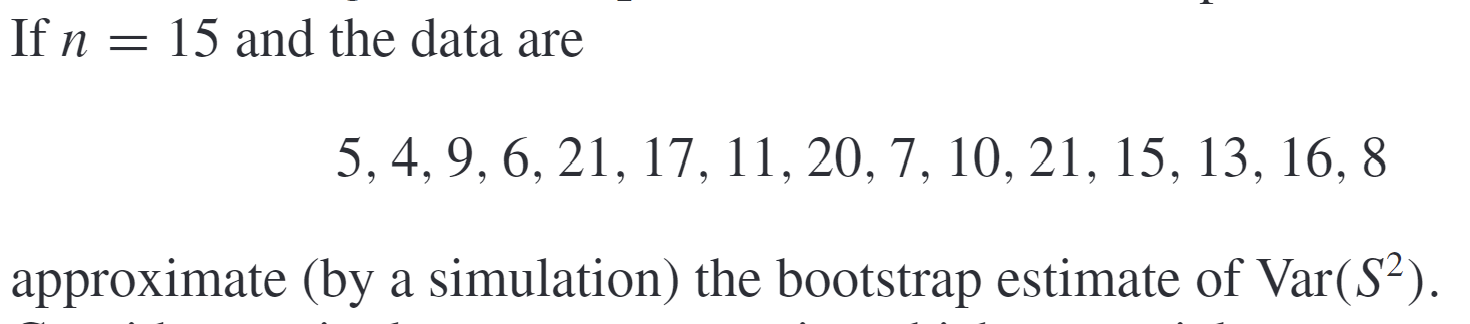

In [21]:
X = np.array([5, 4, 9, 6, 21, 17,11, 20, 7, 10, 21, 15, 13, 16,8])
#sample variance
s2 = np.var(X, ddof=1)
iterations = 10000
variances = np.zeros(iterations)
for i in range(iterations):
    # bootstrap sample from X
    X_sample = np.random.choice(X, len(X), replace=True)
    X_mean = np.mean(X_sample)
    variances[i] = np.sum((X_sample - X_mean)**2) / (len(X_sample) - 1)

#var of sample variance
s2_var = np.var(variances, ddof=1)
print("Var(S^2) = {}".format(s2_var))

Var(S^2) = 57.93935827665216


### 3
Write a subroutine that takes as input a “data” vector of
observed values, and which outputs the median as well as the
bootstrap estimate of the variance of the median, based on
r = 100 bootstrap replicates. Simulate N = 200 Pareto
distributed random variates with β = 1 and k = 1.05.

##### (a) 
Compute the mean and the median (of the sample)
#### (b) 
Make the bootstrap estimate of the variance of the sample
mean.
#### (c) 
Make the bootstrap estimate of the variance of the sample
median.
#### (d) 
Compare the precision of the estimated median with the
precision of the estimated mean

In [27]:
# Simulate N = 200 pareto random variables with beta = 1 and k = 1.05
U = np.random.uniform(0, 1, 200)
beta = 1
k = 1.05
X = beta*(U**(-1/k)-1)

replicates = 10000
sample_mean = np.mean(X)
sample_median = np.median(X)



X_sample = np.random.choice(X, (len(X), replicates), replace=True)
means = np.mean(X_sample, axis=0)
medians = np.median(X_sample, axis=0)


mean_variance = np.var(means, ddof=1)
median_variance = np.var(medians, ddof=1)
print("mean = {} and mean variance = {}".format(np.mean(means), mean_variance))
print("median = {} and median variance = {}".format(np.mean(medians), median_variance))

mean = 4.070260066804001 and mean variance = 0.772210017240221
median = 1.0956784525002263 and median variance = 0.02215663281382656


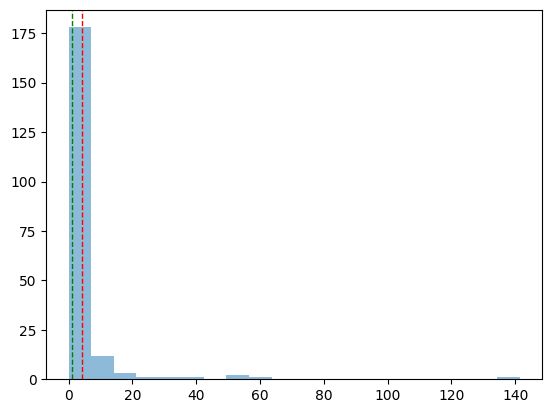

In [29]:
#plot X
import matplotlib.pyplot as plt
plt.hist(X, bins=20, alpha=0.5, label='X')
#show sample mean
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=1)
#show sample median
plt.axvline(sample_median, color='g', linestyle='dashed', linewidth=1)
plt.show()